<a href="https://colab.research.google.com/github/shashwat-D/pressure-strain-modelling-NN/blob/main/Pressure_strain_model_NN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pressure Strain Modelling in Turbulent Flows - Deep Neural Network #2


### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

## Part 1 - Data *Preprocessing*

### Importing the dataset

In [ ]:
mean_0550 = pd.read_csv(r'Dataset\0550_mean_prof.csv')
mean_1000 = pd.read_csv(r'Dataset\1000_mean_prof.csv')
mean_2000 = pd.read_csv(r'Dataset\2000_mean_prof.csv')
mean_5200 = pd.read_csv(r'Dataset\5200_mean_prof.csv')

RSTE_uv_0550 = pd.read_csv(r'Dataset\0550_RSTE_uv_prof.csv')
RSTE_uv_1000 = pd.read_csv(r'Dataset\1000_RSTE_uv_prof.csv')
RSTE_uv_2000 = pd.read_csv(r'Dataset\2000_RSTE_uv_prof.csv')
RSTE_uv_5200 = pd.read_csv(r'Dataset\5200_RSTE_uv_prof.csv')

In [ ]:
mean_0550

,y/delta,y^+,U,dU/dy,W,P
0,0.000000,0.0000,0.0000,1.000000,0.000000,0.000000e+00
1,0.000005,0.0027,0.0027,1.000000,0.000001,-7.390000e-15
2,0.000025,0.0135,0.0135,1.000000,0.000007,-4.610000e-12
3,0.000069,0.0377,0.0377,1.000000,0.000021,-2.810000e-10
4,0.000149,0.0809,0.0809,1.000000,0.000044,-5.850000e-09
...,...,...,...,...,...,...
187,0.963000,523.0000,21.0000,0.001150,0.003440,-4.030000e-01
188,0.971000,528.0000,21.0000,0.000900,0.003570,-4.020000e-01
189,0.979000,532.0000,21.0000,0.000647,0.003670,-4.020000e-01
190,0.988000,537.0000,21.0000,0.000391,0.003740,-4.010000e-01


In [ ]:
RSTE_uv_0550

,y/delta,y^+,Production,Turbulent_Transport,Viscous_Transport,Pressure_Strain,Pressure_Transport,Viscous_Dissipation,Balance
0,0.000000,0.0000,0.000000e+00,4.850000e-15,-1.090000e-10,0.101000,-0.101000,4.520000e-20,-1.090000e-10
1,0.000005,0.0027,-7.390000e-15,-1.600000e-14,-1.580000e-05,0.101000,-0.101000,-1.050000e-05,-3.600000e-11
2,0.000025,0.0135,-4.610000e-12,-8.160000e-12,-7.900000e-05,0.100000,-0.100000,-5.270000e-05,-3.770000e-10
3,0.000069,0.0377,-2.810000e-10,-4.980000e-10,-2.220000e-04,0.100000,-0.100000,-1.480000e-04,-2.700000e-09
4,0.000149,0.0809,-5.850000e-09,-1.030000e-08,-4.800000e-04,0.100000,-0.100000,-3.210000e-04,-9.830000e-09
...,...,...,...,...,...,...,...,...,...
187,0.963000,523.0000,-4.620000e-04,-2.140000e-04,-5.240000e-07,0.000234,0.000397,-3.290000e-05,-1.270000e-05
188,0.971000,528.0000,-3.620000e-04,-1.700000e-04,-4.700000e-07,0.000180,0.000311,-2.580000e-05,-1.520000e-05
189,0.979000,532.0000,-2.600000e-04,-1.220000e-04,-2.590000e-07,0.000127,0.000222,-1.860000e-05,-1.500000e-05
190,0.988000,537.0000,-1.570000e-04,-7.340000e-05,-1.220000e-07,0.000076,0.000132,-1.120000e-05,-1.100000e-05


In [ ]:
X_0550_nn2 = pd.DataFrame({"Vel_grad": mean_0550["dU/dy"],
                          "Pressure": mean_0550["P"]})

X_1000_nn2 = pd.DataFrame({"Vel_grad": mean_1000["dU/dy"],
                          "Pressure": mean_1000["P"]})

X_2000_nn2 = pd.DataFrame({"Vel_grad": mean_2000["dU/dy"],
                          "Pressure": mean_2000["P"]})

X_5200_nn2 = pd.DataFrame({"Vel_grad": mean_5200["dU/dy"],
                          "Pressure": mean_5200["P"]})

y_0550 = pd.DataFrame({"Pressure_strain": RSTE_uv_0550["Pressure_Strain"]})

y_1000 = pd.DataFrame({"Pressure_strain": RSTE_uv_1000["Pressure_Strain"]})

y_2000 = pd.DataFrame({"Pressure_strain": RSTE_uv_2000["Pressure_Strain"]})

y_5200 = pd.DataFrame({"Pressure_strain": RSTE_uv_5200["Pressure_Strain"]})

In [ ]:
X_0550_nn2

,Vel_grad,Pressure
0,1.000000,0.000000e+00
1,1.000000,-7.390000e-15
2,1.000000,-4.610000e-12
3,1.000000,-2.810000e-10
4,1.000000,-5.850000e-09
...,...,...
187,0.001150,-4.030000e-01
188,0.000900,-4.020000e-01
189,0.000647,-4.020000e-01
190,0.000391,-4.010000e-01


### Pre-processing and splitting the dataset into training and test sets for the 4 cases

In [ ]:
#Case 1: Training=> Re= 550,1000,2000; Testing=> Re=5200
X_train_case1 = pd.concat([X_0550_nn2, X_1000_nn2, X_2000_nn2], axis=0, ignore_index=True)
X_test_case1 = X_5200_nn2
y_train_case1 = pd.concat([y_0550, y_1000, y_2000], axis=0, ignore_index=True)
y_test_case1 = y_5200

#Case 2: Training=> Re= 5200,550,1000; Testing=> Re=2000
X_train_case2 = pd.concat([X_5200_nn2, X_0550_nn2, X_1000_nn2], axis=0, ignore_index=True)
X_test_case2 = X_2000_nn2
y_train_case2 = pd.concat([y_5200, y_0550, y_1000], axis=0, ignore_index=True)
y_test_case2 = y_2000

#Case 3: Training=> Re= 2000,5200,550; Testing=> Re=1000
X_train_case3 = pd.concat([X_2000_nn2, X_5200_nn2, X_0550_nn2], axis=0, ignore_index=True)
X_test_case3 = X_1000_nn2
y_train_case3 = pd.concat([y_2000, y_5200, y_0550], axis=0, ignore_index=True)
y_test_case3 = y_1000

#Case 4: Training=> Re= 1000,2000,5200; Testing=> Re=550
X_train_case4 = pd.concat([X_1000_nn2, X_2000_nn2, X_5200_nn2], axis=0, ignore_index=True)
X_test_case4 = X_0550_nn2
y_train_case4 = pd.concat([y_1000, y_2000, y_5200], axis=0, ignore_index=True)
y_test_case4 = y_0550

#Set of all cases
X_train_cases = [X_train_case1, X_train_case2, X_train_case3, X_train_case4]
X_test_cases = [X_test_case1, X_test_case2, X_test_case3, X_test_case4]
y_train_cases = [y_train_case1, y_train_case2, y_train_case3, y_train_case4]
y_test_cases = [y_test_case1, y_test_case2, y_test_case3, y_test_case4]

In [ ]:
X_train_cases[1]

,Vel_grad,Pressure
0,1.000000,0.000000e+00
1,1.000000,-4.720000e-09
2,1.000000,-3.850000e-07
3,1.000000,-6.060000e-06
4,0.999000,-4.480000e-05
...,...,...
1211,0.000481,-4.100000e-01
1212,0.000375,-4.100000e-01
1213,0.000268,-4.090000e-01
1214,0.000161,-4.090000e-01


## Part 2 - Building the ANN

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense

class CustomModel(tf.keras.Model):

    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.layer_1 = Dense(units=20, input_dim=2)
        self.layer_2 = Dense(20, "tanh")
        self.layer_3 = Dense(20, "tanh")
        self.layer_4 = Dense(20, "tanh")
        self.layer_5 = Dense(20, "tanh")
        self.layer_out = Dense(1, "tanh")

    def call(self, inputs):
        x = self.layer_1(inputs)
        x = self.layer_2(x)
        x = self.layer_3(x)
        x = self.layer_4(x)
        x = self.layer_5(x)
        x = self.layer_out(x)
        return x

Case- 1

Fold 1
___________________________________________________________________________
6/6 [==============================] - 0s 3ms/step - loss: 8.5407e-05 - coeff_det: 0.5844
Loss(E, R2):  [8.540743874618784e-05, 0.5844349265098572]
Log Loss:  -9.36807735620685


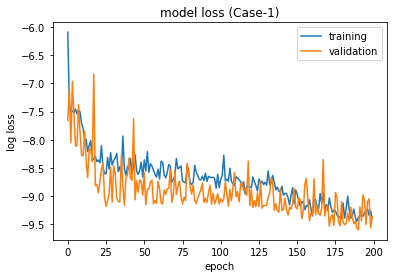


Fold 2
___________________________________________________________________________
6/6 [==============================] - 0s 5ms/step - loss: 9.5320e-05 - coeff_det: 0.5963
Loss(E, R2):  [9.531997056910768e-05, 0.5963015556335449]
Log Loss:  -9.258271214492618


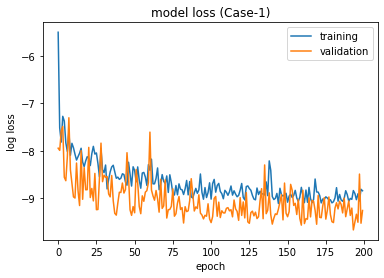


Fold 3
___________________________________________________________________________
6/6 [==============================] - 0s 3ms/step - loss: 1.2010e-04 - coeff_det: 0.6549
Loss(E, R2):  [0.00012009619968011975, 0.6549237966537476]
Log Loss:  -9.027217472342185


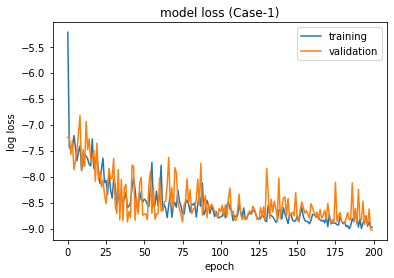


Fold 4
___________________________________________________________________________
6/6 [==============================] - 0s 3ms/step - loss: 1.6563e-04 - coeff_det: 0.4267
Loss(E, R2):  [0.00016562824021093547, 0.4267245829105377]
Log Loss:  -8.705764797877427


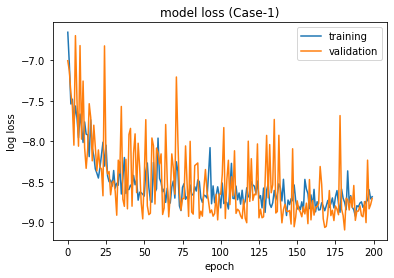


Fold 5
___________________________________________________________________________
6/6 [==============================] - 0s 3ms/step - loss: 1.3835e-04 - coeff_det: 0.7198
Loss(E, R2):  [0.00013834696437697858, 0.7198095917701721]
Log Loss:  -8.885745793591298


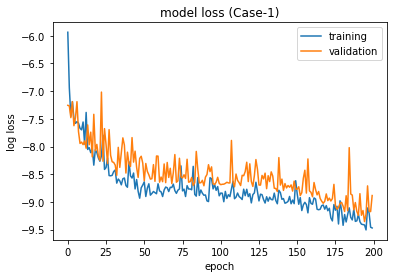

Case- 2

Fold 1
___________________________________________________________________________
8/8 [==============================] - 0s 3ms/step - loss: 2.8191e-05 - coeff_det: 0.5458
Loss(E, R2):  [2.819057772285305e-05, 0.5457748770713806]
Log Loss:  -10.476522759154918


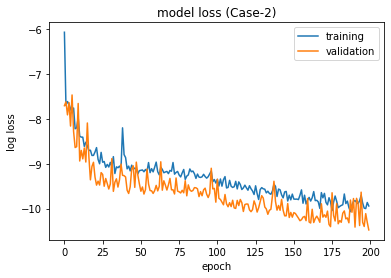


Fold 2
___________________________________________________________________________
8/8 [==============================] - 0s 2ms/step - loss: 6.3703e-05 - coeff_det: 0.4847
Loss(E, R2):  [6.370310438796878e-05, 0.48471570014953613]
Log Loss:  -9.661277262068639


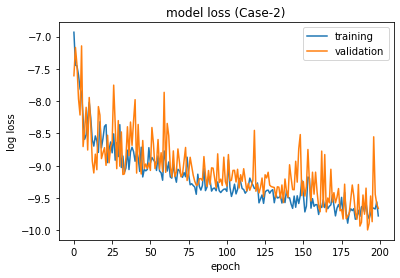


Fold 3
___________________________________________________________________________
8/8 [==============================] - 0s 2ms/step - loss: 4.2855e-05 - coeff_det: 0.6680
Loss(E, R2):  [4.285460090613924e-05, 0.6679877042770386]
Log Loss:  -10.05769754631251


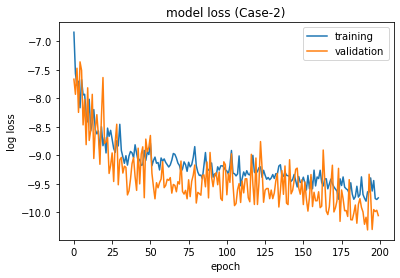


Fold 4
___________________________________________________________________________
8/8 [==============================] - 0s 3ms/step - loss: 8.1083e-05 - coeff_det: 0.5550
Loss(E, R2):  [8.108323527267203e-05, 0.5550436973571777]
Log Loss:  -9.42003433494823


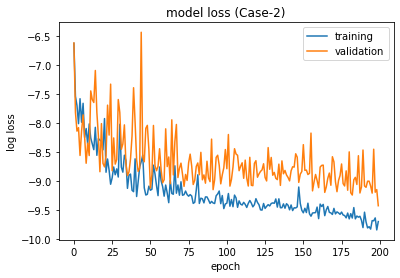


Fold 5
___________________________________________________________________________
8/8 [==============================] - 0s 2ms/step - loss: 5.1561e-05 - coeff_det: 0.5411
Loss(E, R2):  [5.156131737749092e-05, 0.5411129593849182]
Log Loss:  -9.87273882984167


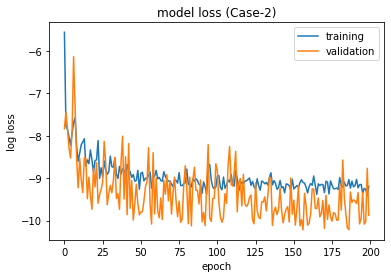

Case- 3

Fold 1
___________________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 9.5177e-05 - coeff_det: 0.8186
Loss(E, R2):  [9.517668513581157e-05, 0.8185803890228271]
Log Loss:  -9.259775550196437


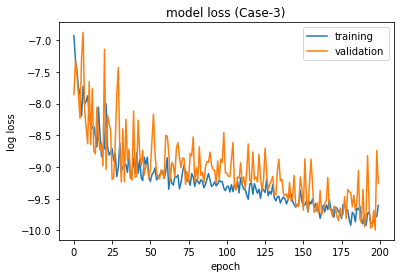


Fold 2
___________________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 4.4123e-05 - coeff_det: 0.5568
Loss(E, R2):  [4.41225893155206e-05, 0.5567639470100403]
Log Loss:  -10.028538677279274


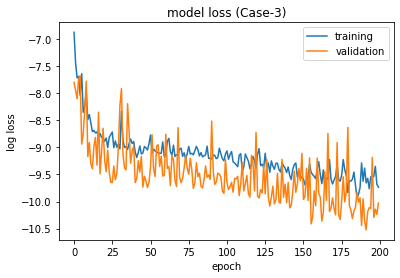


Fold 3
___________________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 1.3276e-04 - coeff_det: 0.3296
Loss(E, R2):  [0.00013275790843181312, 0.32962536811828613]
Log Loss:  -8.92698332574238


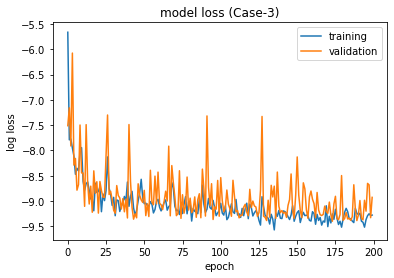


Fold 4
___________________________________________________________________________
9/9 [==============================] - 0s 3ms/step - loss: 4.7736e-05 - coeff_det: 0.5981
Loss(E, R2):  [4.7735808038851246e-05, 0.5981390476226807]
Log Loss:  -9.949828749060371


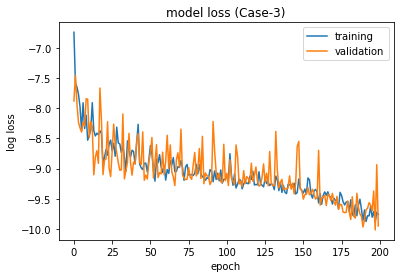


Fold 5
___________________________________________________________________________
9/9 [==============================] - 0s 3ms/step - loss: 3.8297e-05 - coeff_det: 0.3493
Loss(E, R2):  [3.829700654023327e-05, 0.3492847681045532]
Log Loss:  -10.170138823050639


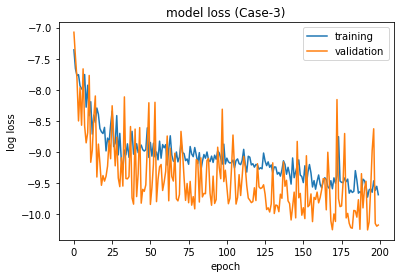

Case- 4

Fold 1
___________________________________________________________________________
9/9 [==============================] - 0s 3ms/step - loss: 5.3846e-05 - coeff_det: 0.6506
Loss(E, R2):  [5.3845771617488936e-05, 0.6506180167198181]
Log Loss:  -9.829386678939949


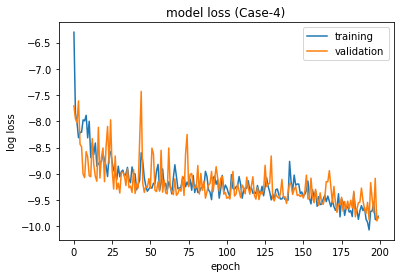


Fold 2
___________________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 5.2377e-05 - coeff_det: 0.5404
Loss(E, R2):  [5.237687946646474e-05, 0.540432870388031]
Log Loss:  -9.85704529556458


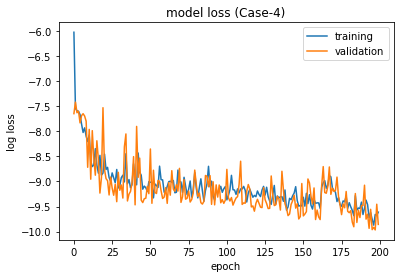


Fold 3
___________________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 3.6637e-05 - coeff_det: 0.5654
Loss(E, R2):  [3.663712413981557e-05, 0.5653727054595947]
Log Loss:  -10.214448510872671


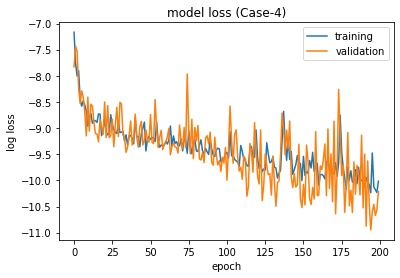


Fold 4
___________________________________________________________________________
9/9 [==============================] - 0s 3ms/step - loss: 1.9240e-05 - coeff_det: 0.6604
Loss(E, R2):  [1.9239954781369306e-05, 0.660365104675293]
Log Loss:  -10.858521462970156


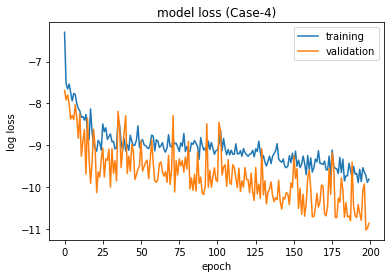


Fold 5
___________________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 3.5891e-05 - coeff_det: 0.5804
Loss(E, R2):  [3.5890741855837405e-05, 0.5804201364517212]
Log Loss:  -10.235031182752646


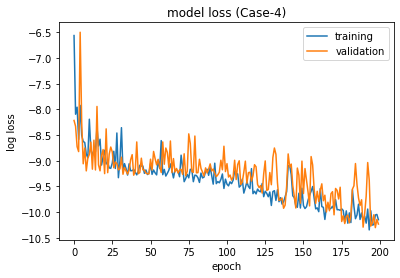

In [ ]:
from sklearn.model_selection import KFold 
from keras import backend as K
from sklearn.metrics import r2_score

checkpoint_no = 'C:/Users/Dell/Desktop/BTP/results_NN2'

loss_cases = []

#Defining the coefficient of determination function
def coeff_det(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_pred) ) )
    return ( 1 - (SS_res/SS_tot) )

for num in range(4):
    print("===========")
    print("Case-", num+1)
    print("===========")
    
    #Initialising the K-fold cross validation
    kf = KFold(n_splits = 5, shuffle=True)

    fold = 1
    avg_loss_kfold = []
    for train_index, val_index in kf.split(X_train_cases[num]):
        
        print("\nFold", fold)
        fold = fold+1
        print("___________________________________________________________________________")

        model = CustomModel()
        model.compile(optimizer='adam', 
                  loss='mean_squared_error',
                  metrics=[coeff_det])
        history = model.fit(X_train_cases[num].iloc[train_index,:], y_train_cases[num].iloc[train_index], 
                          validation_data=(X_train_cases[num].iloc[val_index,:], y_train_cases[num].iloc[val_index]), 
                          batch_size = 5, 
                          epochs = 200, 
                          verbose = 0)
        score = model.evaluate(X_train_cases[num].iloc[val_index,:], y_train_cases[num].iloc[val_index]) 
        print("Loss(E, R2): ", score)
        print("Log Loss: ",np.log(score[0]))
        avg_loss_kfold.append(score)
        
        # summarizing history for loss
        plt.plot(np.log(history.history['loss']))
        plt.plot(np.log(history.history['val_loss']))
        plt.title('model loss (Case-'+ str(num+1) +')')
        plt.ylabel('log loss')
        plt.xlabel('epoch')
        plt.legend(['training', 'validation'], loc='upper right')
        lossPlot = plt.gcf()
        plt.show()
        
        # saving the loss curves
        lossPlot.savefig(checkpoint_no + '/' + 'NN2_lossPlot_' + 'case_' + str(num+1) + '_fold_' + str(fold-1) + ".png")

        # saving the history to csv
        hist_df = pd.DataFrame(history.history)
        hist_df['epoch'] = hist_df.index + 1
        cols = list(hist_df.columns)
        cols = [cols[-1]] + cols[:-1]
        hist_df = hist_df[cols]
        hist_df.to_csv(checkpoint_no + '/' + 'NN2_hist_' + 'case_' + str(num+1) + '_fold_' + str(fold-1) + '.csv')
        hist_df.head()
    loss_cases.append(avg_loss_kfold)


In [ ]:
import statistics
E_cases = []
R2_cases = []
for i in range(4):
    E = []
    R2 = []
    for j in range(5):
        E.append(loss_cases[i][j][0]) 
        R2.append(loss_cases[i][j][1])
    E_cases.append(statistics.mean(E))
    R2_cases.append(statistics.mean(R2))

In [ ]:
# E_cases.insert(0,"E")
# E_cases.insert(0,"Train")

E_cases = [ "Train", "E"] + E_cases

# R2_cases.insert(0,"R2")
# R2_cases.insert(0,"Train")

R2_cases = ["Train", "R2"] + R2_cases

# rows = E_cases.append(R2_cases)
train_df = pd.DataFrame(columns=['Phase', 'Metric', 'Case-1', 'Case-2','Case-3', 'Case-4'])
train_df.loc[len(train_df)] = E_cases
train_df.loc[len(train_df)] = R2_cases

train_df

,Phase,Metric,Case-1,Case-2,Case-3,Case-4
0,Train,E,0.000121,0.000053,0.000072,0.000040
1,Train,R2,0.596439,0.558927,0.530479,0.599442


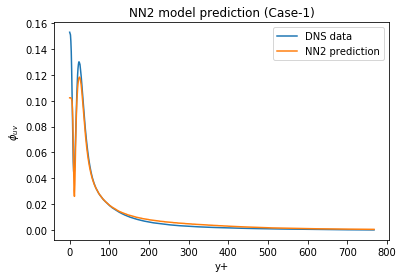

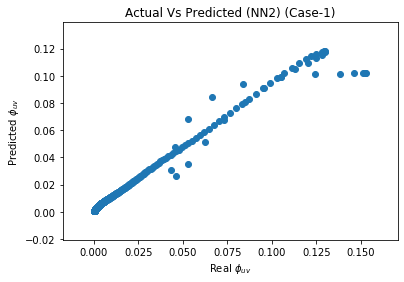

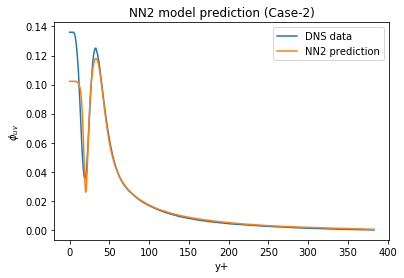

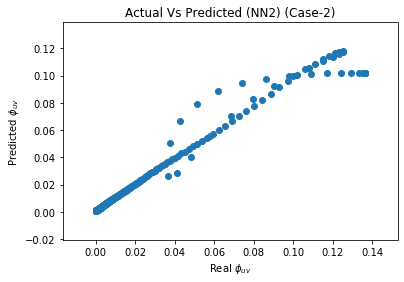

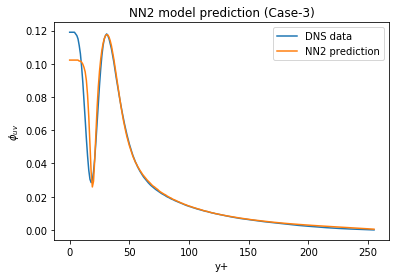

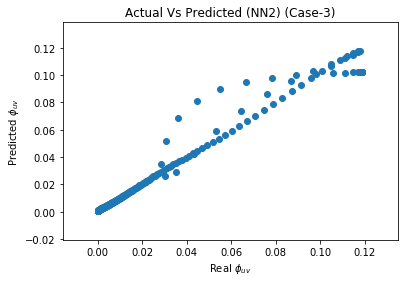

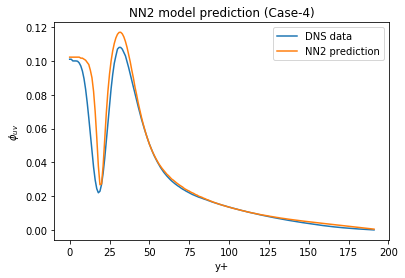

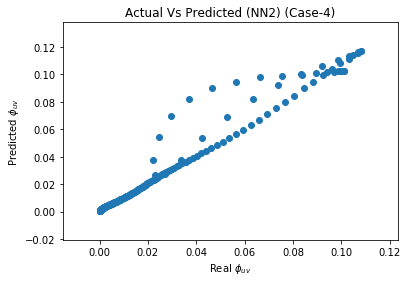

,Phase,Metric,Case-1,Case-2,Case-3,Case-4
0,Test,E,0.00002,0.000036,0.000031,0.000067
1,Test,R2,0.96767,0.967310,0.972974,0.936966


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_cases = []
test_E_cases = []
test_R2_cases = []

for num in range(4):
    y_pred = model.predict(X_test_cases[num])
    y_pred_cases.append(y_pred)
    
    # plotting y and y_pred
    plt.plot(y_test_cases[num])
    plt.plot(y_pred)
    plt.title('NN2 model prediction (Case-'+ str(num+1) +')')
    plt.ylabel(r'$\phi_{uv}$')
    plt.xlabel('y+')
    plt.legend(['DNS data', 'NN2 prediction'], loc='upper right')
    lossPlot = plt.gcf()
    plt.show()
    # saving the plot
    lossPlot.savefig(checkpoint_no + '/' + 'NN2_predPlot_' + 'case_' + str(num+1) + ".png")
    
    # plotting y vs y_pred
    plt.scatter(y_test_cases[num], y_pred)
    plt.title('Actual Vs Predicted (NN2) (Case-'+ str(num+1) +')')
    plt.ylabel(r'Predicted $\phi_{uv}$')
    plt.xlabel(r'Real $\phi_{uv}$')
    actpredPlot = plt.gcf()
    plt.show()
    # saving the plot
    actpredPlot.savefig(checkpoint_no + '/' + 'actVpredPlot_' + 'case_' + str(num+1) + ".png")
    
    test_E = mean_squared_error(y_test_cases[num],y_pred)
    test_E_cases.append(test_E)
    
    test_R2 = r2_score(y_test_cases[num],y_pred)
    test_R2_cases.append(test_R2)

test_E_cases = [ "Test", "E"] + test_E_cases
test_R2_cases = ["Test", "R2"] + test_R2_cases

test_df = pd.DataFrame(columns=['Phase', 'Metric', 'Case-1', 'Case-2','Case-3', 'Case-4'])
test_df.loc[len(test_df)] = test_E_cases
test_df.loc[len(test_df)] = test_R2_cases

test_df

In [ ]:
result_df = pd.concat([train_df,test_df], ignore_index=True)
result_df

,Phase,Metric,Case-1,Case-2,Case-3,Case-4
0,Train,E,0.000121,0.000053,0.000072,0.000040
1,Train,R2,0.596439,0.558927,0.530479,0.599442
2,Test,E,0.000020,0.000036,0.000031,0.000067
3,Test,R2,0.967670,0.967310,0.972974,0.936966
